# Census Income

**Project Description**

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). 

**The prediction task is to determine whether a person makes over $50K a year.**

**Description of fnlwgt (final weight)**

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.\
2.Controls for Hispanic Origin by age and sex.\
3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

**Dataset Link**

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Census%20Income/Census%20Income.csv


**1. Importing all required python libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

**2. Downloading data from above mentioned link and reading it from csv file and imported to Jupyter notbook for further evaluaton.**

In [4]:
data = pd.read_csv('Census Income.csv')
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [5]:
df = pd.DataFrame(data)
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We have successfuly imported data into Jupyter notebook and created dataframe for the same.

**3. Exploratory Data Analysis (EDA)**

In [6]:
# Checking number of rows and columns

In [7]:
df.shape

(32560, 15)

There are 32560 rows and 15 columns present in the dataset.

In [8]:
# Checking for duplicated values

In [9]:
df.duplicated().sum()

24

We can see 24 duplicate values present in the dataset.

In [10]:
# Dropping duplicate values

In [11]:
df.drop_duplicates(keep='last', inplace=True)

In [12]:
df.shape

(32536, 15)

After closly looking at csv file I found question mark symbol ('?') present in the dataset.

In [13]:
# Checking count of '?' within the dataset.

In [14]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

From above we can see, question mark symbol('?') is present in the features Workclass, Occupation, and Native_country.

In [15]:
# Replacing '?' with NaN values to make our dataset neat and clean.

In [16]:
df = df.replace(' ?', np.NaN)

In [17]:
# Verifying if '?' is change to NaN values

In [18]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

We have successfully removed '?' from our dataset.

In [19]:
# Checking for null/missing values

In [20]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

<Axes: >

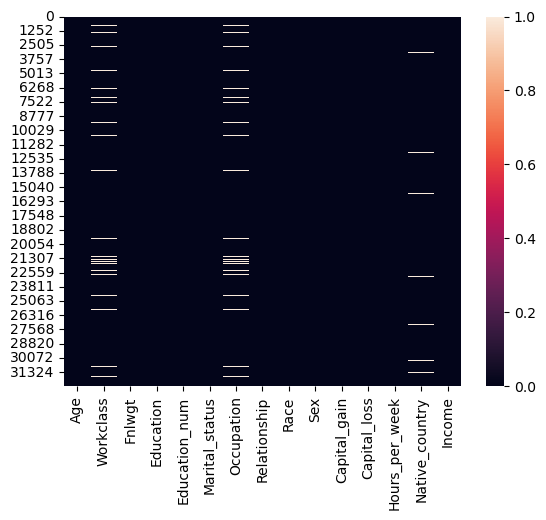

In [21]:
sns.heatmap(df.isnull())

From above heatmap, we can see, there are some null/missing values present in the dataset and we will need to treat them later for our model to predict the result accurately.

In [22]:
# Checking column information

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       30700 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      30693 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  31954 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


We have 9 categorical variables (object) and 6 numerical variables (int64) present in the dataset.

In [24]:
# Categorising Numerical and Categorical variables

In [25]:
num =['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']
cat =['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Native_country','Income']

In [26]:
# Filling missing values present in the categorical features Workclass, Occupation, and Native_country

In [27]:
df['Workclass'].fillna(df['Workclass'].mode()[0], inplace = True)
df['Occupation'].fillna(df['Occupation'].mode()[0], inplace = True)
df['Native_country'].fillna(df['Native_country'].mode()[0], inplace = True)

In [28]:
# Verifying if null values are replaced 

In [29]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<Axes: >

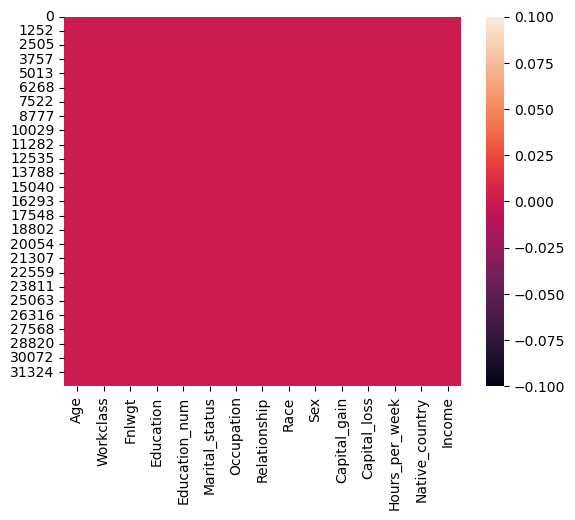

In [30]:
sns.heatmap(df.isnull())

Now we can see null values are successfully replaced with mode value of the columns.

In [31]:
# Checking Statistical Summary

In [32]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32536.0,38.585536,13.638193,17.0,28.0,37.0,48.00,90.0
Fnlwgt,32536.0,189784.298992,105556.258211,12285.0,117831.5,178356.0,236993.25,1484705.0
Education_num,32536.0,10.081725,2.571622,1.0,9.0,10.0,12.00,16.0
Capital_gain,32536.0,1078.410069,7388.068465,0.0,0.0,0.0,0.00,99999.0
Capital_loss,32536.0,87.370912,403.107737,0.0,0.0,0.0,0.00,4356.0
Hours_per_week,32536.0,40.440343,12.347079,1.0,40.0,40.0,45.00,99.0


From above we can see the statistical summary of the numerical columns.
* Minimum age of peron is 17 and maximum is 90 years and average age is 37.
* Minimum years at education is 1 and maximum is 16 with average 10.
* Minimum captial gain means investment outside the salary income is 0 and maximum is 99999. It seems there are some errors in the dataset.
* Minimum captial loss is 0 and maximum is 4356.
* Minimum hours per week work is 1 and maximum hourse per week is 99 while average hourse worked per week is 40.

In [33]:
# Exploring categorical feature for insight.

In [34]:
for c in cat:
    print(c)
    print(df[c].value_counts())
    print('*******************************************')

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
*******************************************
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
*******************************************
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Mar

**4. Visualisation**

In [35]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

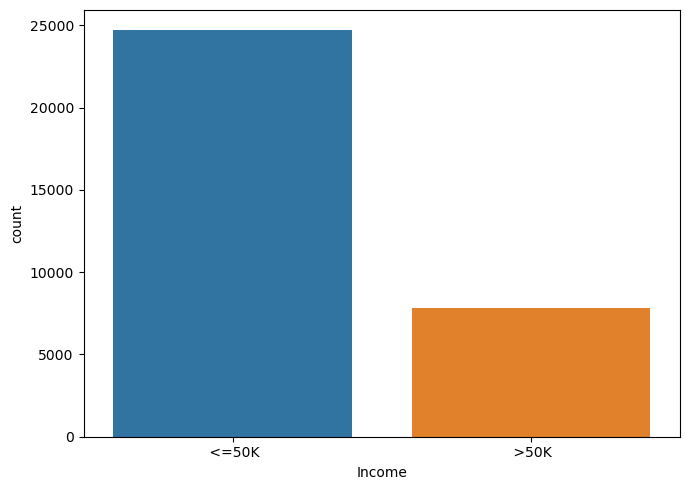

In [36]:
plt.figure(figsize = (7,5))
sns.countplot(x=df['Income'])
plt.tight_layout()

<Axes: ylabel='Income'>

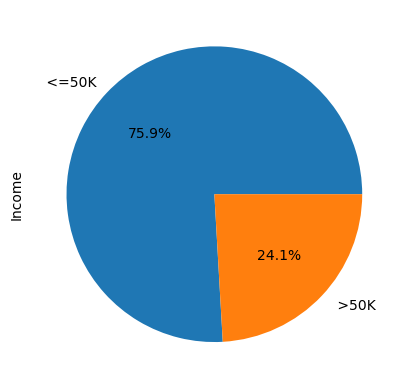

In [37]:
df['Income'].value_counts().plot.pie(autopct='%3.1f%%')

From above countplot and piechart, we can see almost 76% people earn income less than 50k.

Since, 'Income' is our output variable, we can see some data imbalance in our target variable and we will need to make the data balance for our model. 

In [38]:
# Age vs Income

<Axes: xlabel='Age', ylabel='Count'>

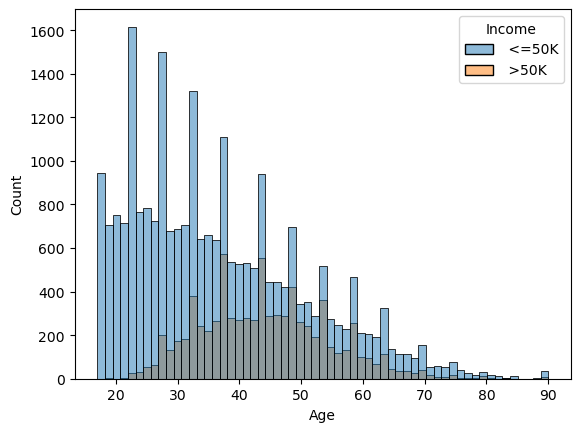

In [39]:
sns.histplot(x=df['Age'], hue = df['Income'])

As we already have seen earlier, 24% people earn more than 50k income and 76% earn less than 50k.
* Age between 40 to 60 earn maximum income more than 50k
* Above 60 years, income drops significantly due to decrease in age

In [40]:
# Workclass Vs Income

<Axes: ylabel='Workclass'>

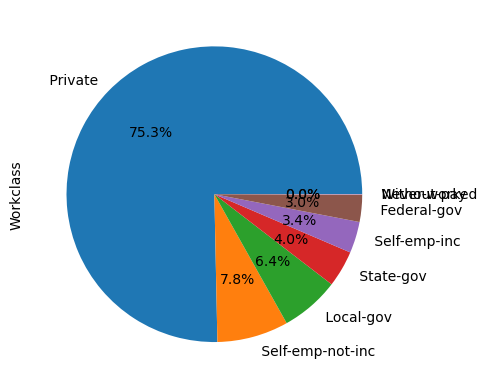

In [41]:
df['Workclass'].value_counts().plot.pie(autopct='%3.1f%%')

From above piechart, we can see almost 76% people works in private sector.
* 7.8% people are self employees
* 6.4% people work in local government
* 4% people in state government and 3% people belongs to federal government

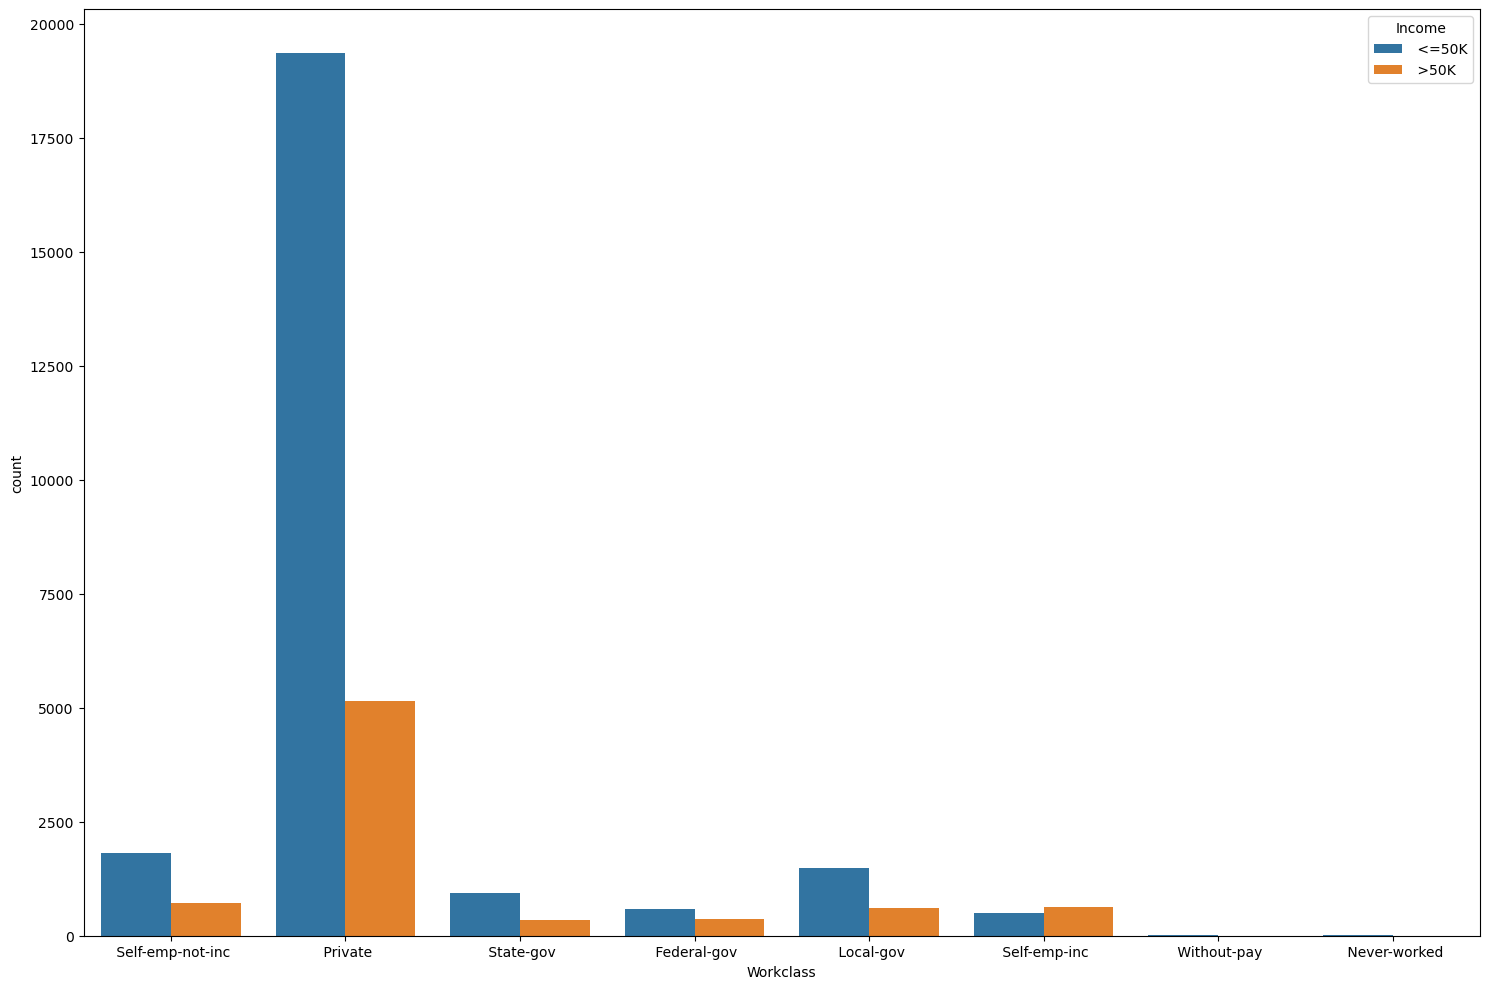

In [42]:
plt.figure(figsize=(15,10))
sns.countplot(x = df['Workclass'], hue = df['Income'])
plt.tight_layout()

Above countplot shows intresting insights about people working in different sectors. 
* Almost 50% people working as self employee not incorporated earn more than 50k
* In Private sector we can see big difference in employees where less than 25%  earn more than 50k
* Self employee incorporated employees who earn more than 50k exceeds employees who earn less than 50k which is quiet interesting
* More than 50% Federal government employees earn 50k or more income
* Local goverment employees who earns less than 50k exceeds employees earning more than 50k

**Overall we can see high wage rates for governmen employees.**

In [43]:
# Education Vs Income

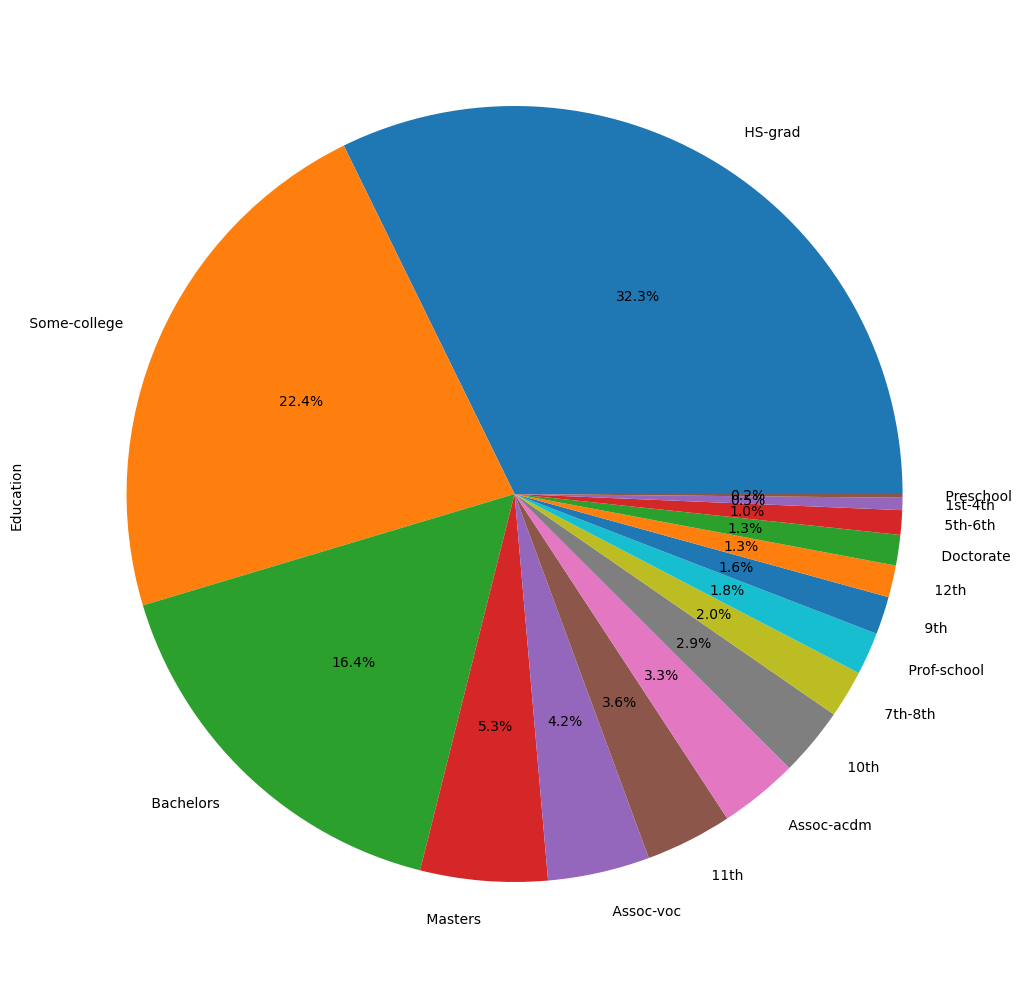

In [44]:
plt.figure(figsize=(15,10))
df['Education'].value_counts().plot.pie(autopct='%3.1f%%')
plt.tight_layout()

Above piechart indicates the education levels for employees.
* 32.3% people have HS-grad education, which is amongst highest
* 22.4% people have done some college level of education
* Bachelors contributes to 16.4%
* 5.3% and 1.3% people have done their Masters and Doctorate level of education resepectively

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Education', ylabel='count'>

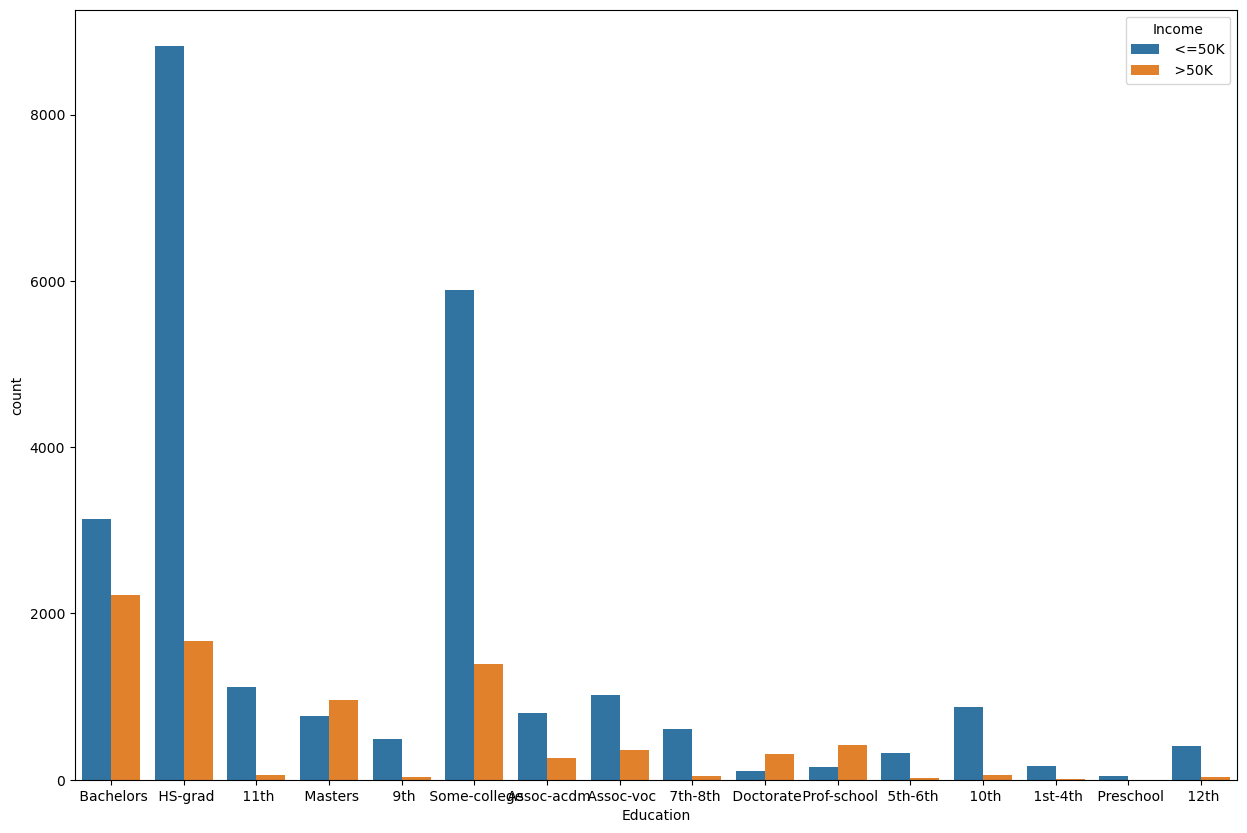

In [45]:
plt.figure(figsize=(15,10))
plt.tight_layout()
plt.legend(fontsize=16)
sns.countplot(x = df['Education'], hue = df['Income'])

From above countplot we can see,
* Bachelors who earns more than 50k are highest in numbers compare to other educated people
* People with education below 12th are mostly earns less than 50k
* Masters, Doctorate, and School professors who are considered highly intellectul people earns more than 50k exceeds who earn less than 50k

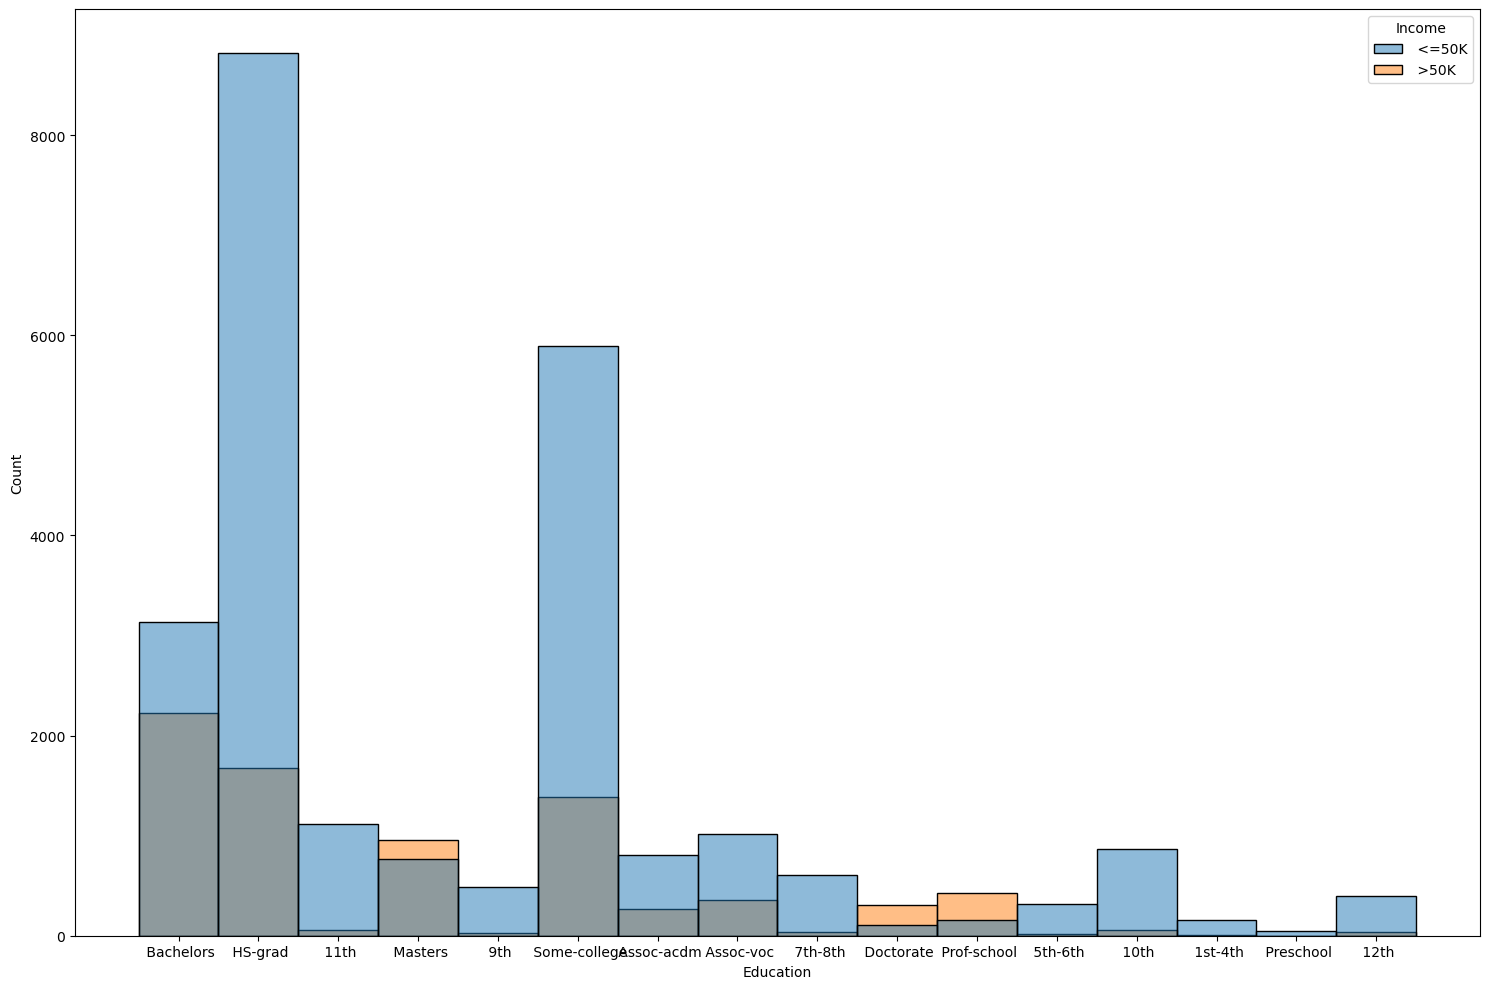

In [46]:
plt.figure(figsize=(15,10))
sns.histplot(x = df['Education'], hue= df['Income'])
plt.tight_layout()

In [47]:
pd.crosstab(df['Education'],df["Workclass"])

Workclass,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Education,,,,,,,,
10th,6,31,2,795,19,67,13,0
11th,9,36,1,1041,14,60,14,0
12th,5,19,0,373,7,19,10,0
1st-4th,0,4,0,146,2,13,1,0
5th-6th,1,9,0,295,4,19,4,0
7th-8th,2,28,1,495,14,94,10,1
9th,3,23,0,438,10,34,6,0
Assoc-acdm,55,88,0,776,35,71,41,1
Assoc-voc,38,86,0,1066,38,108,46,0


From above crosstab we can see,
* Most number of HS-grad people are from privte sector followed by Bachelors
* There are few number of people below 12th, who earns any sort of income

In [48]:
# Marital_status Vs Income

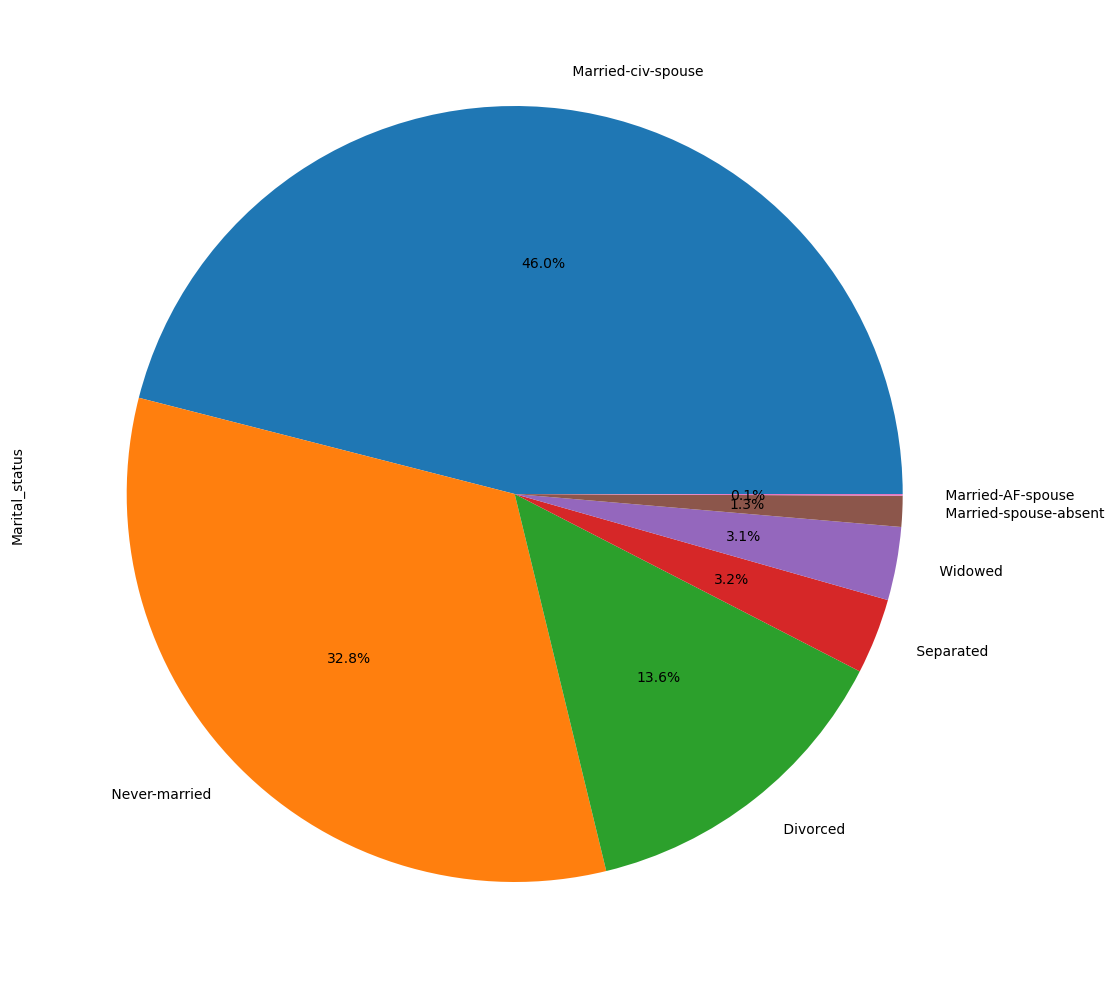

In [49]:
plt.figure(figsize=(15,10))
df['Marital_status'].value_counts().plot.pie(autopct='%2.1f%%')
plt.tight_layout()

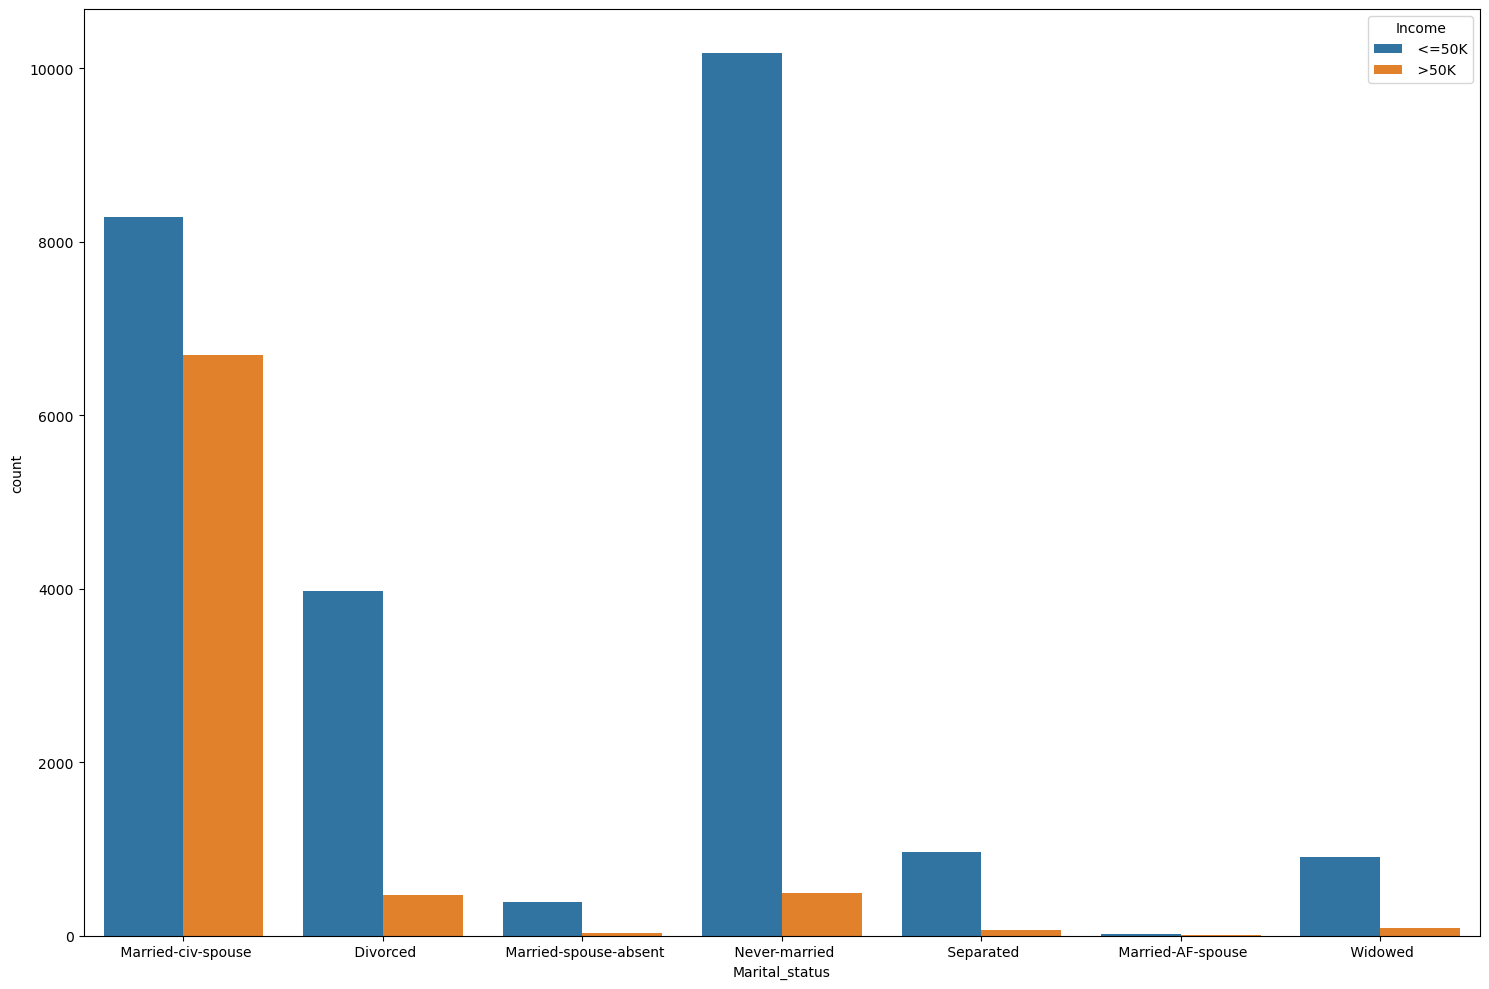

In [50]:
plt.figure(figsize=(15,10))
sns.countplot(x = df['Marital_status'], hue = df['Income'])
plt.tight_layout()

In [51]:
pd.crosstab(df['Marital_status'],df["Income"]).T

Marital_status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
Income,,,,,,,
<=50K,3978,13,8280,384,10175,959,908
>50K,463,10,6690,34,491,66,85


From above we can see,
* Maximum number of people who earns more tha 50k are married
* 32.8% are never married and mostly they earns less than 50k
* Divorced people are 13.6% in numbers and mostly earns less than 50k

In [52]:
# Occupation VS Income

<Axes: ylabel='Occupation'>

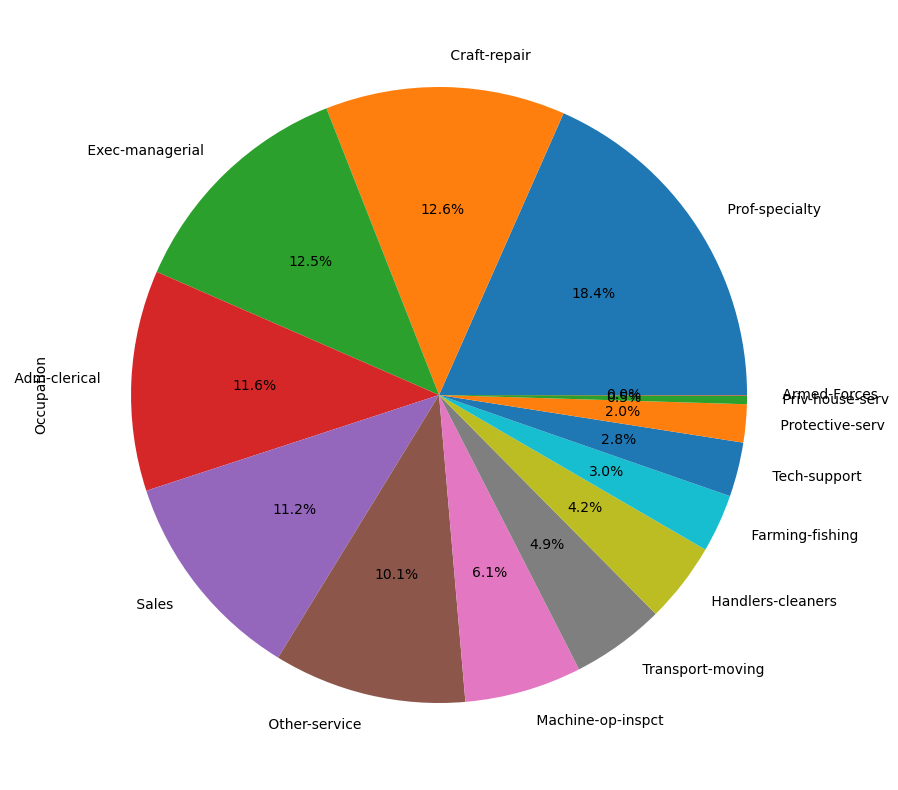

In [53]:
plt.figure(figsize=(15,10))
df['Occupation'].value_counts().plot.pie(autopct='%2.1f%%')

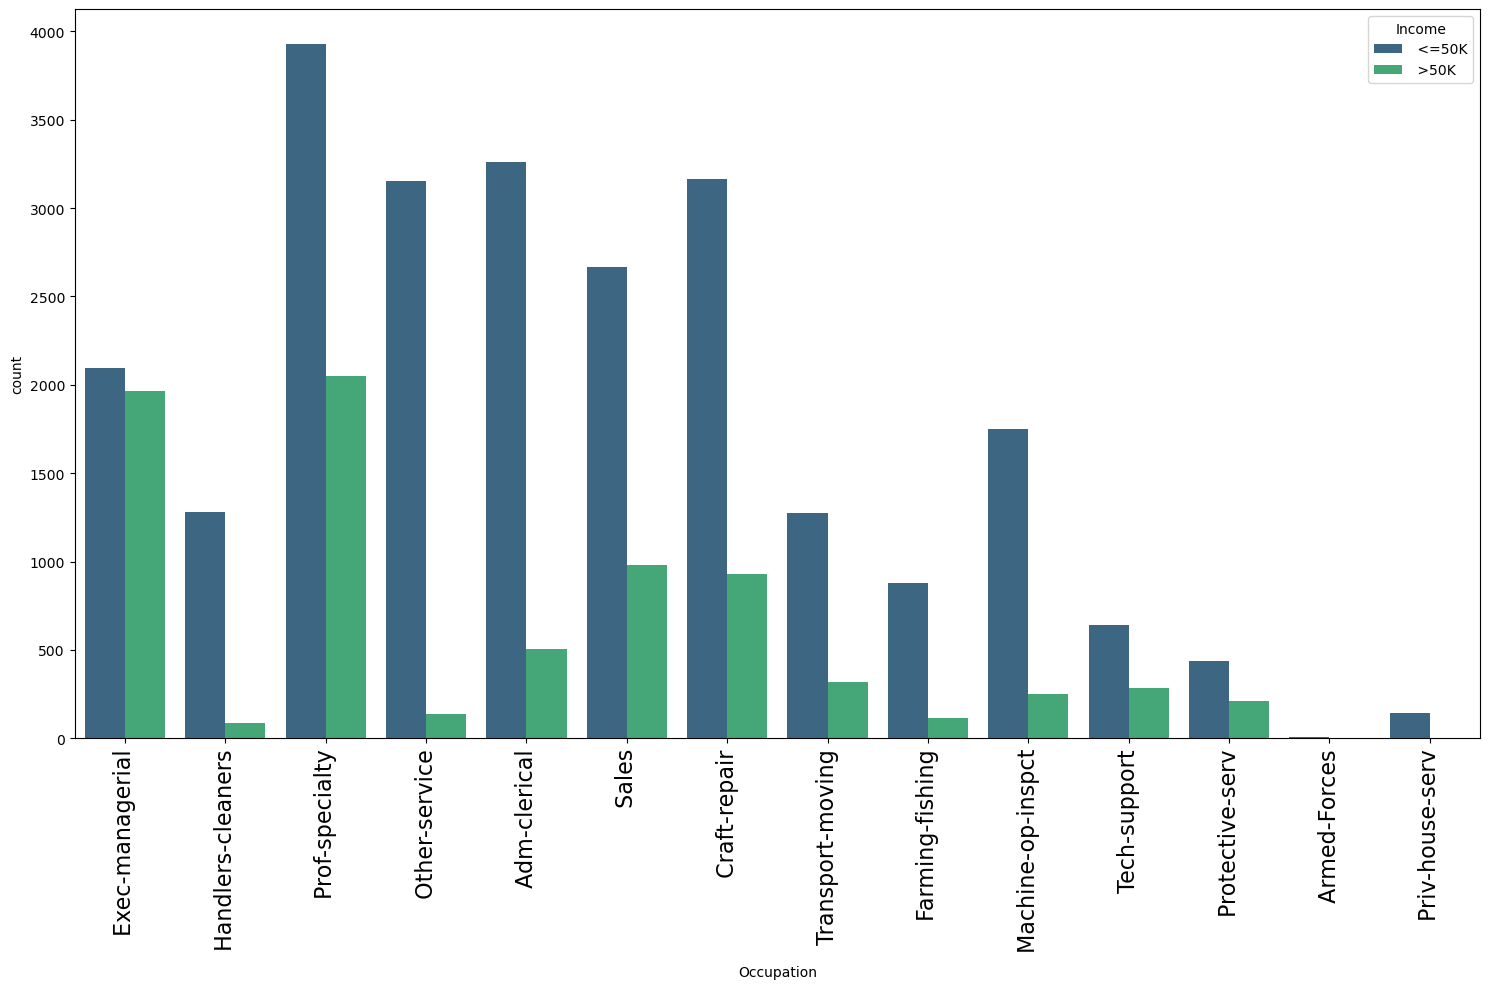

In [54]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,x = 'Occupation', hue = 'Income', palette = 'viridis')
plt.xticks(fontsize=16,rotation=90)
plt.tight_layout()

In [55]:
pd.crosstab(df['Occupation'],df["Income"])

Income,<=50K,>50K
Occupation,,
Adm-clerical,3260,507
Armed-Forces,8,1
Craft-repair,3165,929
Exec-managerial,2097,1968
Farming-fishing,877,115
Handlers-cleaners,1283,86
Machine-op-inspct,1751,249
Other-service,3154,137
Priv-house-serv,146,1


From above we can see,
* Maximum people who earns more than 50k are from Prof-speciality occupation followed by Executive managerial
* Private house service occupation have only once chance of earnings more than 50k out of 147 people
* Armed forces occupation earns more thn 50 only once out of 8 position

In [56]:
# Relationship VS Income

<Axes: ylabel='Relationship'>

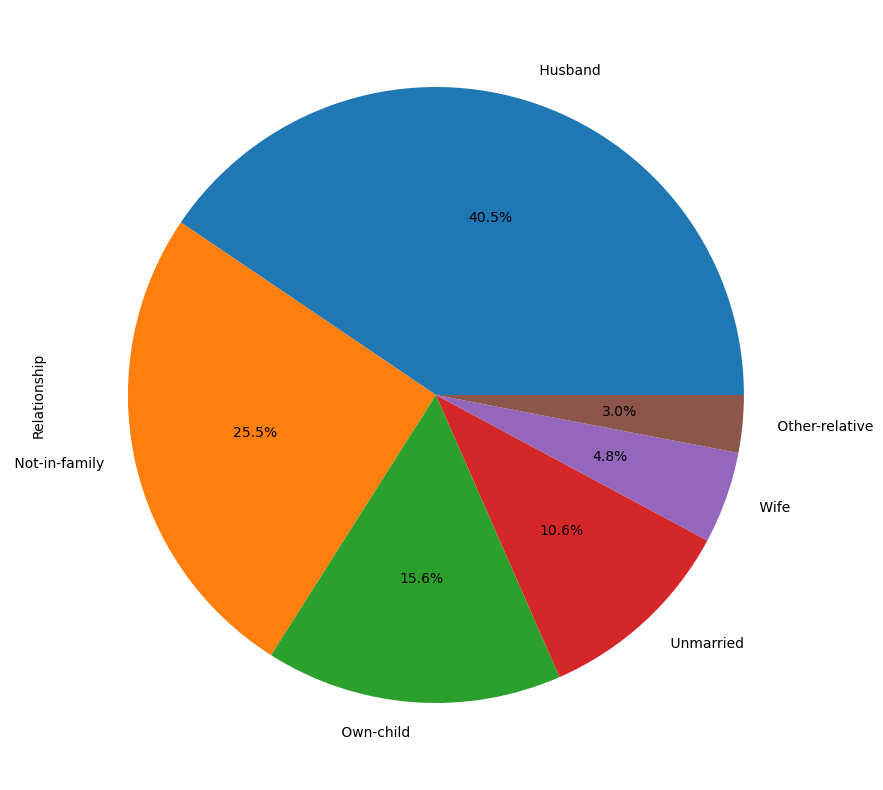

In [57]:
plt.figure(figsize=(15,10))
df['Relationship'].value_counts().plot.pie(autopct='%2.1f%%')

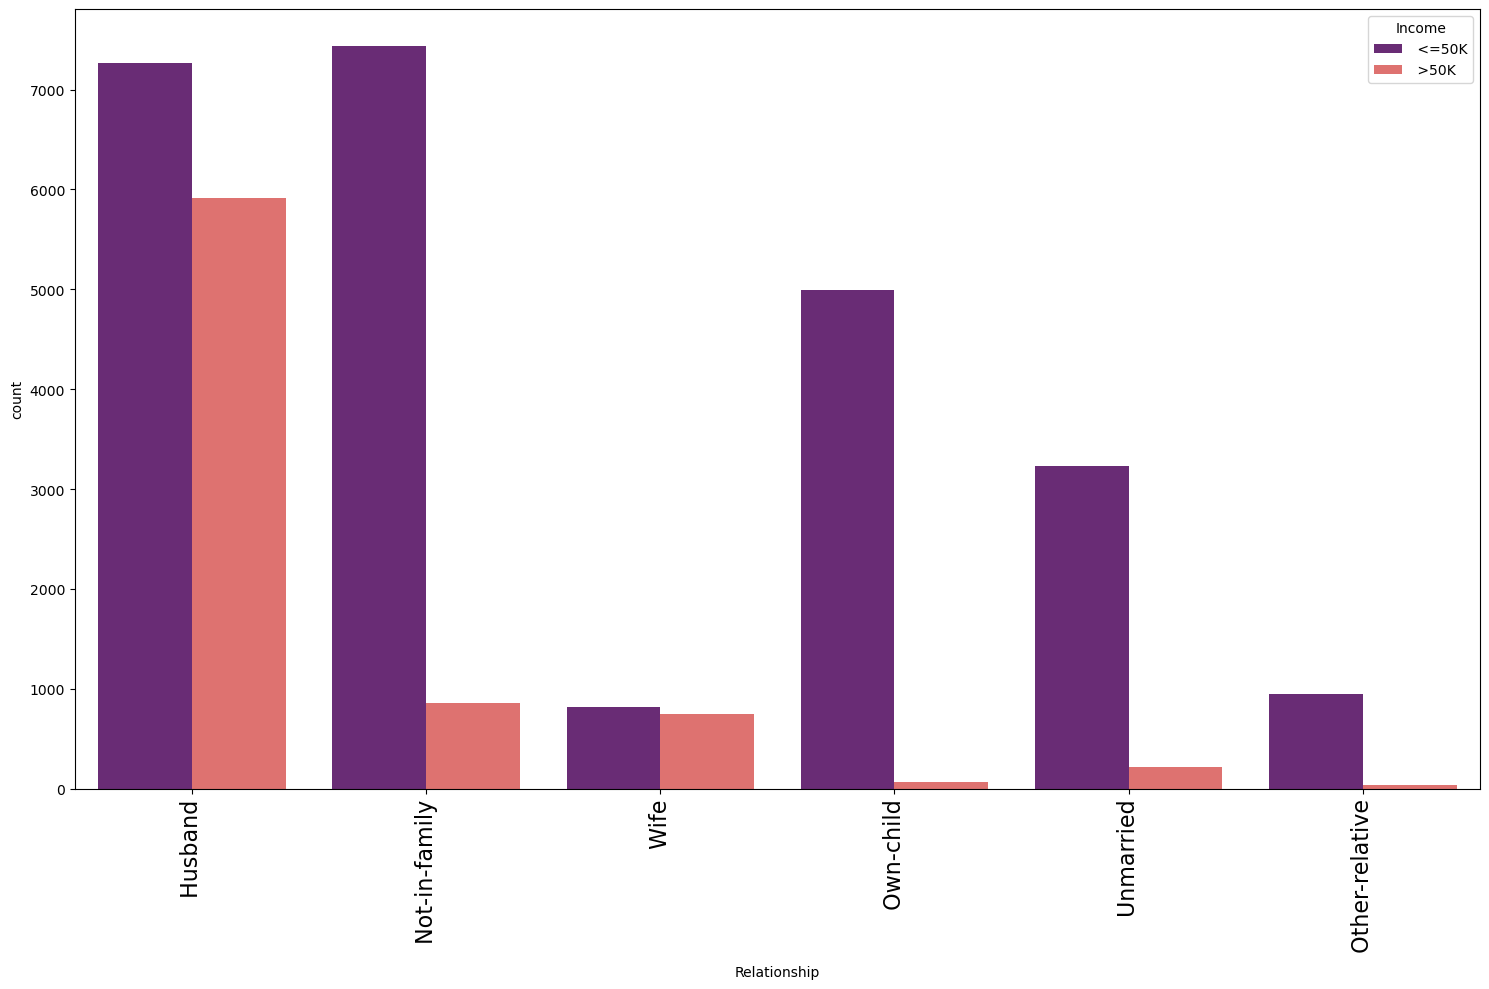

In [58]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,x = 'Relationship', hue = 'Income', palette = 'magma')
plt.xticks(fontsize=16,rotation=90)
plt.tight_layout()

In [59]:
pd.crosstab(df['Relationship'],df["Income"])

Income,<=50K,>50K
Relationship,,
Husband,7271,5916
Not-in-family,7435,856
Other-relative,944,37
Own-child,4997,67
Unmarried,3227,218
Wife,823,745


From above we can see,
* Maximum number of Husbands earns more than 50k compare to other relationship
* Wife relationship is also having equal chance of earning more than 50k than who earns less than 50k

In [60]:
# Race vs Income

<Axes: ylabel='Race'>

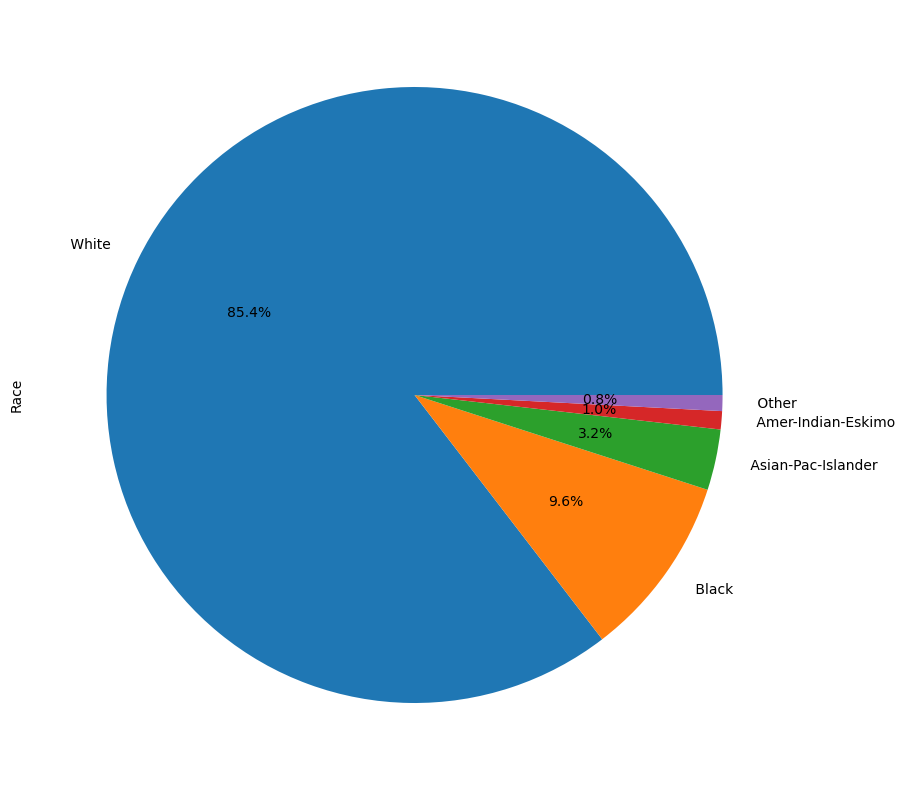

In [61]:
plt.figure(figsize=(15,10))
df['Race'].value_counts().plot.pie(autopct='%2.1f%%')

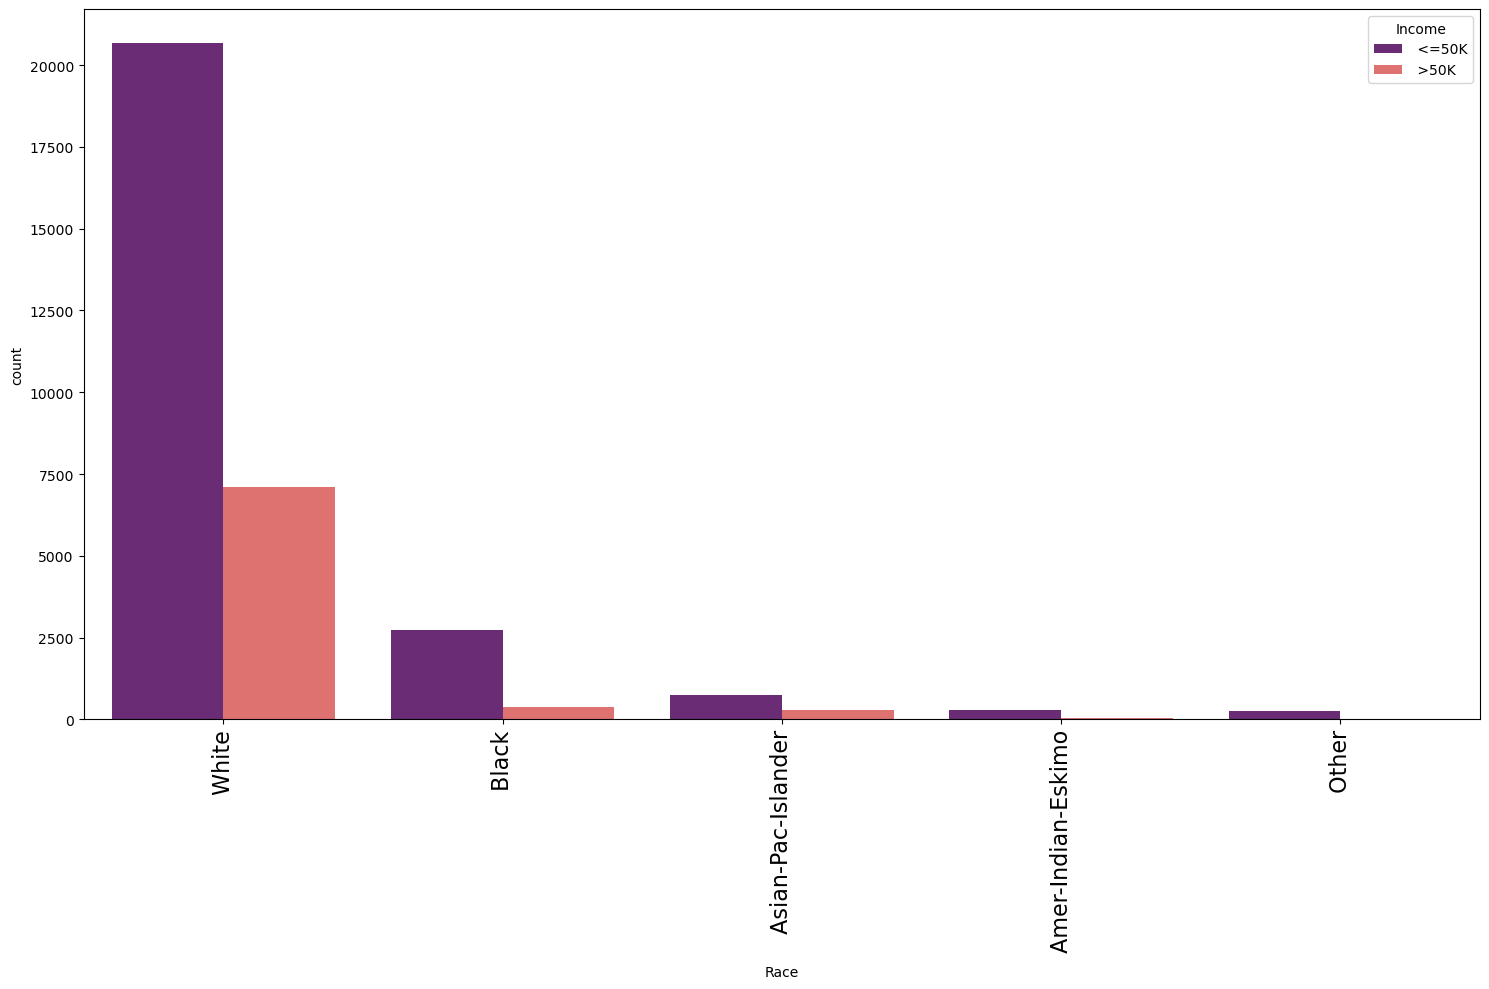

In [62]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,x = 'Race', hue = 'Income', palette = 'magma')
plt.xticks(fontsize=16,rotation=90)
plt.tight_layout()

In [63]:
pd.crosstab(df['Race'],df["Income"])

Income,<=50K,>50K
Race,,
Amer-Indian-Eskimo,275,36
Asian-Pac-Islander,762,276
Black,2735,387
Other,246,25
White,20679,7115


From above we can see,
* There are 85.4% people are from whie community followed by 9.6% Black community
* Maximum number of people earning more than 50k is from white community

In [64]:
# Sex Vs Income

<Axes: ylabel='Sex'>

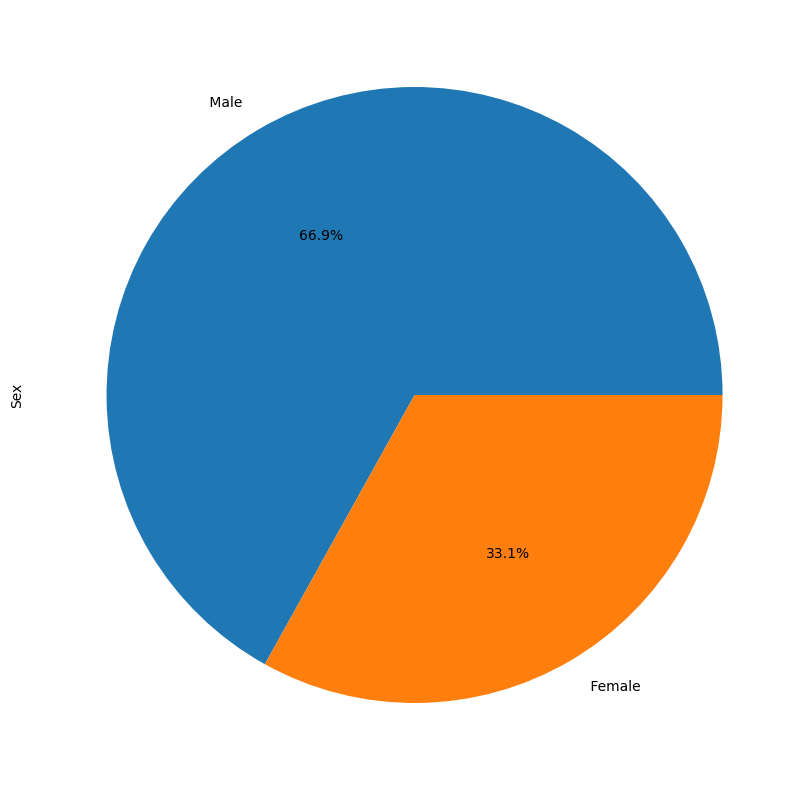

In [65]:
plt.figure(figsize=(15,10))
df['Sex'].value_counts().plot.pie(autopct='%2.1f%%')

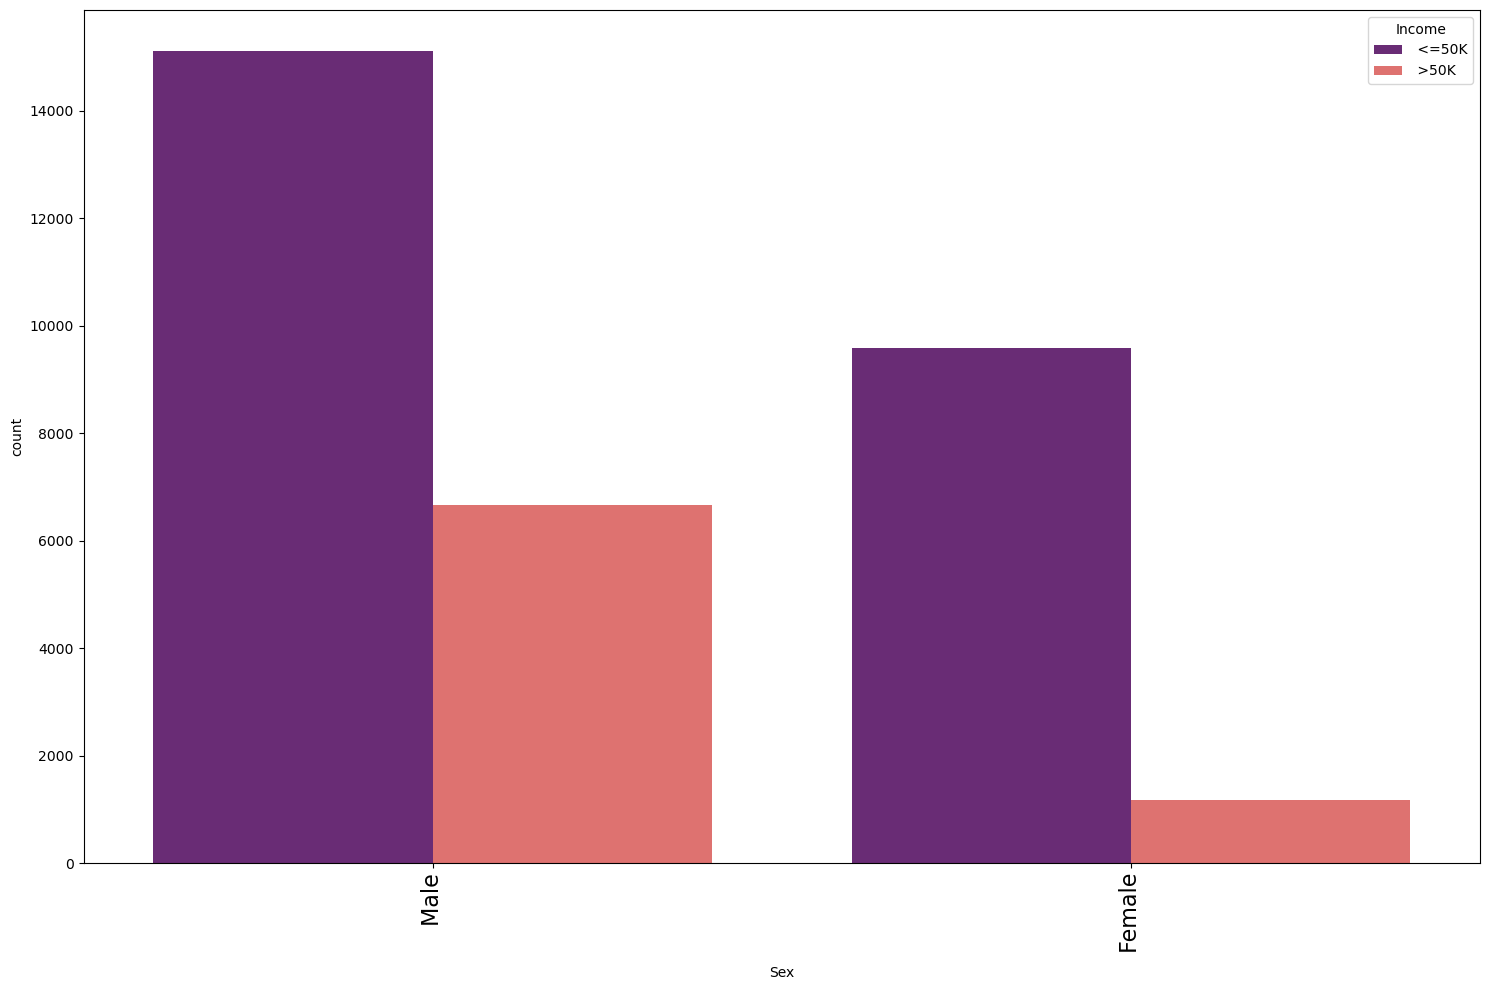

In [66]:
plt.figure(figsize=(15,10))
sns.countplot(data = df,x = 'Sex', hue = 'Income', palette = 'magma')
plt.xticks(fontsize=16,rotation=90)
plt.tight_layout()

From above we can see,
* Almost 67% people are Male and there is big differences in earnings 
* Only few female earns more than 50k compare to male

In [67]:
pd.crosstab([df.Sex,df.Income],df['Occupation']).T

Sex                 Female         Male      
Income               <=50K  >50K  <=50K  >50K
Occupation                                   
 Adm-clerical         2323   212    937   295
 Armed-Forces            0     0      8     1
 Craft-repair          202    20   2963   909
 Exec-managerial       879   280   1218  1688
 Farming-fishing        63     2    814   113
 Handlers-cleaners     160     4   1123    82
 Machine-op-inspct     529    20   1222   229
 Other-service        1748    51   1406    86
 Priv-house-serv       138     1      8     0
 Prof-specialty       1917   437   2013  1612
 Protective-serv        66    10    372   201
 Sales                1175    88   1492   895
 Tech-support          302    45    342   238
 Transport-moving       81     9   1196   311

* Women percentage are 33.1%. Mostly they work in Adm-clerical, other-services, Peof-speciality, and sales
* Men mosly work in craft-repair, Exe-managerial,and Prof-speciality
* Men executive managers earn maximum number of income more than 50k

In [68]:
# Encoding categorical data and transform into numerical form using label encoder

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()

In [71]:
for i in cat:
    df[i] = le.fit_transform(df[i])

In [72]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [73]:
# Detetcting and removing outliers

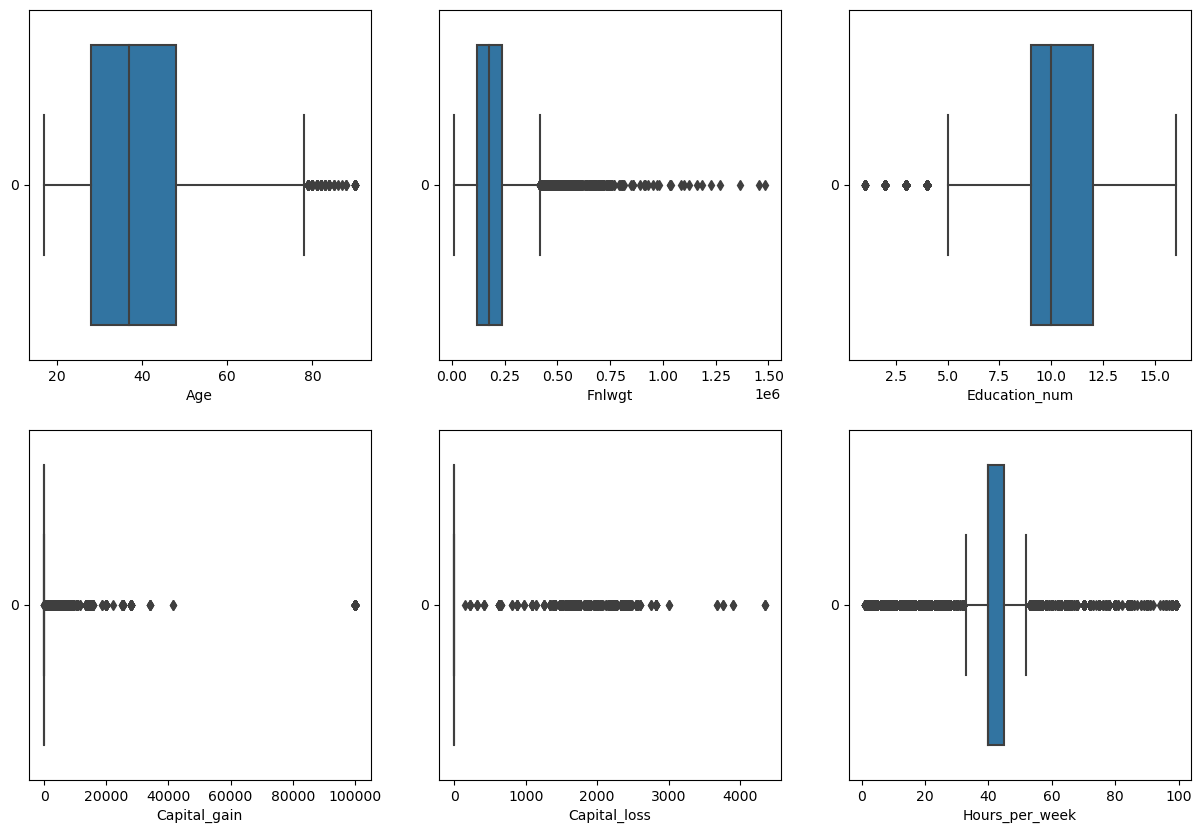

In [74]:
plt.figure(figsize=(15,10))
plot = 1
for i in num:
    if plot <= 6:
        ax = plt.subplot(2,3,plot)
        sns.boxplot(df[i], orient = 'h')
        plt.xlabel(i)
    plot += 1

From above, we can see there are some outliers present in the dataset.

In [75]:
# Dropping unnecessory caolumns

In [76]:
df.drop(['Fnlwgt','Education_num'], axis=1, inplace=True)

In [77]:
from scipy.stats import zscore

In [78]:
z = np.abs(zscore(df))
z

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0.836961,1.720777,0.335272,0.405890,0.790197,0.900122,0.393692,0.703036,0.145969,0.216747,2.222450,0.261135,0.563389
1,0.042934,0.085203,0.181506,1.733664,0.286803,0.277868,0.393692,0.703036,0.145969,0.216747,0.035664,0.261135,0.563389
2,1.056935,0.085203,2.402383,0.405890,0.286803,0.900122,1.962450,0.703036,0.145969,0.216747,0.035664,0.261135,0.563389
3,0.776180,0.085203,0.335272,0.405890,0.719986,2.211146,1.962450,1.422403,0.145969,0.216747,0.035664,5.355163,0.563389
4,0.116259,0.085203,0.439895,0.405890,0.790197,2.211146,0.393692,1.422403,0.145969,0.216747,0.035664,0.261135,0.563389
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0.849505,0.085203,0.852050,0.405890,1.475078,2.211146,0.393692,1.422403,0.145969,0.216747,0.197648,0.261135,0.563389
32556,0.103715,0.085203,0.181506,0.405890,0.035106,0.900122,0.393692,0.703036,0.145969,0.216747,0.035664,0.261135,1.774973
32557,1.423558,0.085203,0.181506,2.249657,1.545289,1.588892,0.393692,1.422403,0.145969,0.216747,0.035664,0.261135,0.563389
32558,1.216128,0.085203,0.181506,0.921884,1.545289,0.966639,0.393692,0.703036,0.145969,0.216747,1.655506,0.261135,0.563389


In [79]:
threshold = 3
print(np.where(z>3))

(array([    3,     9,    10, ..., 32508, 32526, 32528]), array([11, 10,  6, ...,  6,  6,  6]))


In [80]:
dfn = df[(z<3).all(axis=1)]
dfn

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,9,2,3,0,4,1,0,0,13,38,0
1,38,3,11,0,5,1,4,1,0,0,40,38,0
2,53,3,1,2,5,0,2,1,0,0,40,38,0
4,37,3,12,2,3,5,4,0,0,0,40,38,0
5,49,3,6,3,7,1,2,0,0,0,16,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,7,2,12,5,4,0,0,0,38,38,0
32556,40,3,11,2,6,0,4,1,0,0,40,38,1
32557,58,3,11,6,0,4,4,0,0,0,40,38,0
32558,22,3,11,4,0,3,4,1,0,0,20,38,0


In [81]:
df.shape

(32536, 13)

In [82]:
dfn.shape

(28211, 13)

We have successfully removed outliers from our dataset.

In [83]:
# Checking for skewness 

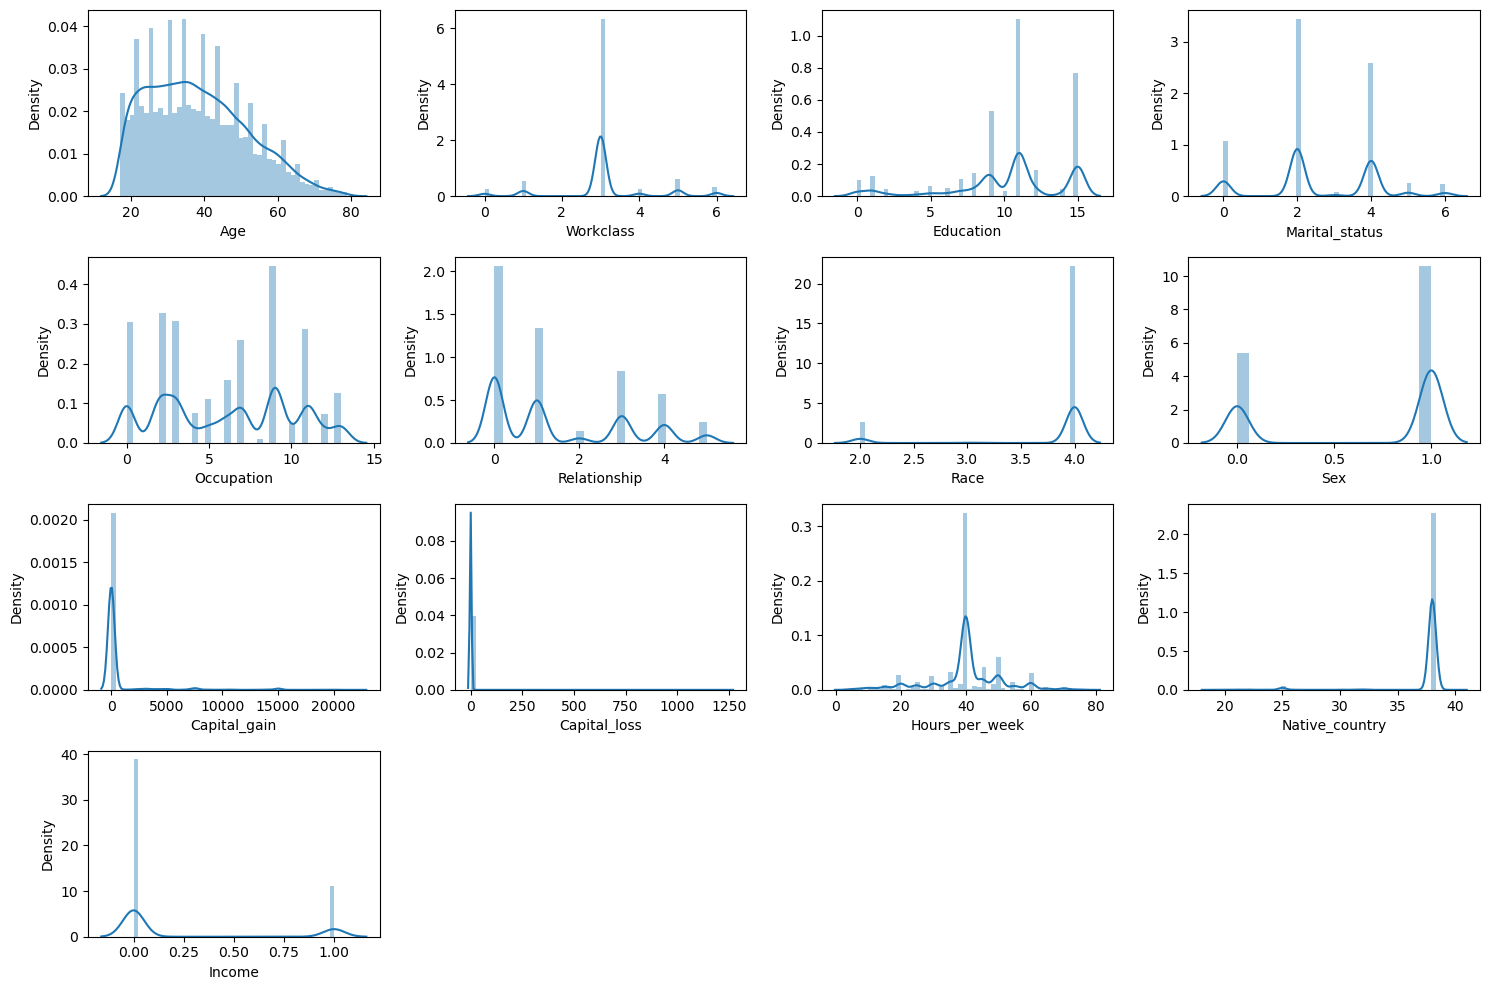

In [84]:
plt.figure(figsize=(15,10))
plot = 1
for i in dfn:
    if plot <= 13:
        ax = plt.subplot(4,4,plot)
        sns.distplot(dfn[i])
        plt.xlabel(i)
    plot += 1
plt.tight_layout()

In [85]:
dfn.skew()

Age                0.485927
Workclass          0.081759
Education         -0.942247
Marital_status    -0.044519
Occupation         0.015860
Relationship       0.754734
Race              -2.546766
Sex               -0.693091
Capital_gain       4.936406
Capital_loss      29.748743
Hours_per_week    -0.356908
Native_country    -5.113280
Income             1.329023
dtype: float64

Fro above we can see skewness present in Education, Relationship, Race, Sex, capital gain,Capital_loss, and Native_country column.

In [86]:
# Checking for correlation

In [87]:
dfn.corr()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.029460,-0.008110,-0.284828,-0.000591,-0.270197,0.018628,0.089214,0.130928,0.023249,0.087774,0.033941,0.239375
Workclass,0.029460,1.000000,0.000811,-0.015782,0.008828,-0.057892,0.067583,0.069584,0.011306,-0.010595,0.027884,0.002554,-0.007464
Education,-0.008110,0.000811,1.000000,-0.037756,-0.042938,-0.006648,0.026293,-0.034711,0.028004,-0.000011,0.059736,0.108221,0.073391
Marital_status,-0.284828,-0.015782,-0.037756,1.000000,0.036150,0.184262,-0.085598,-0.126392,-0.069750,-0.016393,-0.196476,-0.033320,-0.194187
Occupation,-0.000591,0.008828,-0.042938,0.036150,1.000000,-0.038598,0.000239,0.050337,0.009360,-0.004772,-0.022565,0.019836,0.030343
Relationship,-0.270197,-0.057892,-0.006648,0.184262,-0.038598,1.000000,-0.146061,-0.576979,-0.088777,0.030088,-0.260862,-0.005932,-0.247191
Race,0.018628,0.067583,0.026293,-0.085598,0.000239,-0.146061,1.000000,0.122765,0.031422,0.000202,0.056474,0.014712,0.094768
Sex,0.089214,0.069584,-0.034711,-0.126392,0.050337,-0.576979,0.122765,1.000000,0.069187,-0.027315,0.236511,-0.016681,0.210666
Capital_gain,0.130928,0.011306,0.028004,-0.069750,0.009360,-0.088777,0.031422,0.069187,1.000000,-0.009034,0.098826,0.020622,0.343743
Capital_loss,0.023249,-0.010595,-0.000011,-0.016393,-0.004772,0.030088,0.000202,-0.027315,-0.009034,1.000000,-0.003389,0.003343,-0.016358


<Axes: >

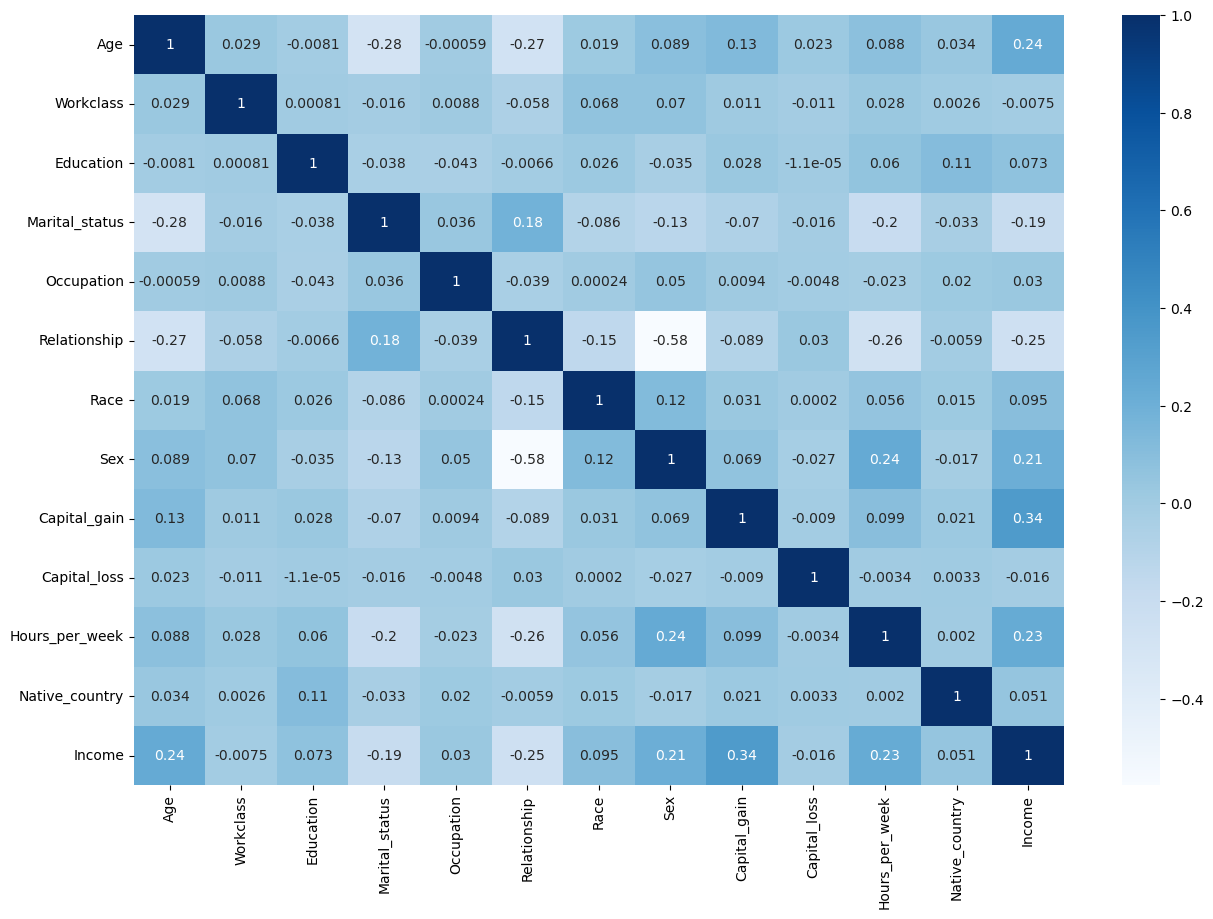

In [88]:
plt.figure(figsize=(15,10))
sns.heatmap(dfn.corr(), annot = True, cmap ='Blues')

In [89]:
# Checking for multicollinearity

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
vif = pd.DataFrame()
vif['Features'] = dfn.columns
vif['VIF Factor'] = [variance_inflation_factor(dfn.values,i)for i in range(dfn.shape[1])]
vif

,Features,VIF Factor
0,Age,10.376272
1,Workclass,8.827484
2,Education,8.165506
3,Marital_status,4.347565
4,Occupation,3.347829
5,Relationship,2.925656
6,Race,35.702486
7,Sex,4.537237
8,Capital_gain,1.206078
9,Capital_loss,1.004092


From above we can see there is multicollinearity present and fe columns are highly correleated.

In [92]:
# Checking for data imbalance

In [93]:
dfn['Income'].value_counts()

0    21912
1     6299
Name: Income, dtype: int64

We can see there is data imbalance i our output variable and we will need to make the balanced withi the dataset.

In [94]:
# Balancing data using SMOTE

In [95]:
import imblearn

In [96]:
from imblearn.over_sampling import SMOTE

In [97]:
st = SMOTE()

In [98]:
# Splitting the dataset into x and y variable

In [99]:
x = dfn.iloc[:,:-1]
x.head()

,Age,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,9,2,3,0,4,1,0,0,13,38
1,38,3,11,0,5,1,4,1,0,0,40,38
2,53,3,1,2,5,0,2,1,0,0,40,38
4,37,3,12,2,3,5,4,0,0,0,40,38
5,49,3,6,3,7,1,2,0,0,0,16,22


In [100]:
y = dfn.iloc[:,-1]
y.head()

0    0
1    0
2    0
4    0
5    0
Name: Income, dtype: int64

In [101]:
os = SMOTE()
x,y = os.fit_resample(x, y)

In [102]:
y.value_counts()

0    21912
1    21912
Name: Income, dtype: int64

We can see our target variable is balanced now

In [103]:
# Scaling the data using standard Scaler

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
st = StandardScaler()

In [106]:
xs = st.fit_transform(x)
xs

array([[ 0.78393994,  1.82459422, -0.40869067, ..., -0.03177075,
        -2.66200491,  0.1773863 ],
       [-0.16870034, -0.01344219,  0.16090798, ..., -0.03177075,
        -0.1492794 ,  0.1773863 ],
       [ 1.02210002, -0.01344219, -2.68708529, ..., -0.03177075,
        -0.1492794 ,  0.1773863 ],
       ...,
       [ 0.94271333, -0.01344219,  1.30010529, ..., -0.03177075,
         1.15361531,  0.1773863 ],
       [ 0.94271333, -2.77049681, -0.69349   , ..., -0.03177075,
        -0.1492794 ,  0.1773863 ],
       [-0.88318055,  0.90557601, -2.40228597, ..., -0.03177075,
        -0.1492794 ,  0.1773863 ]])

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA()

In [109]:
# finding the main components

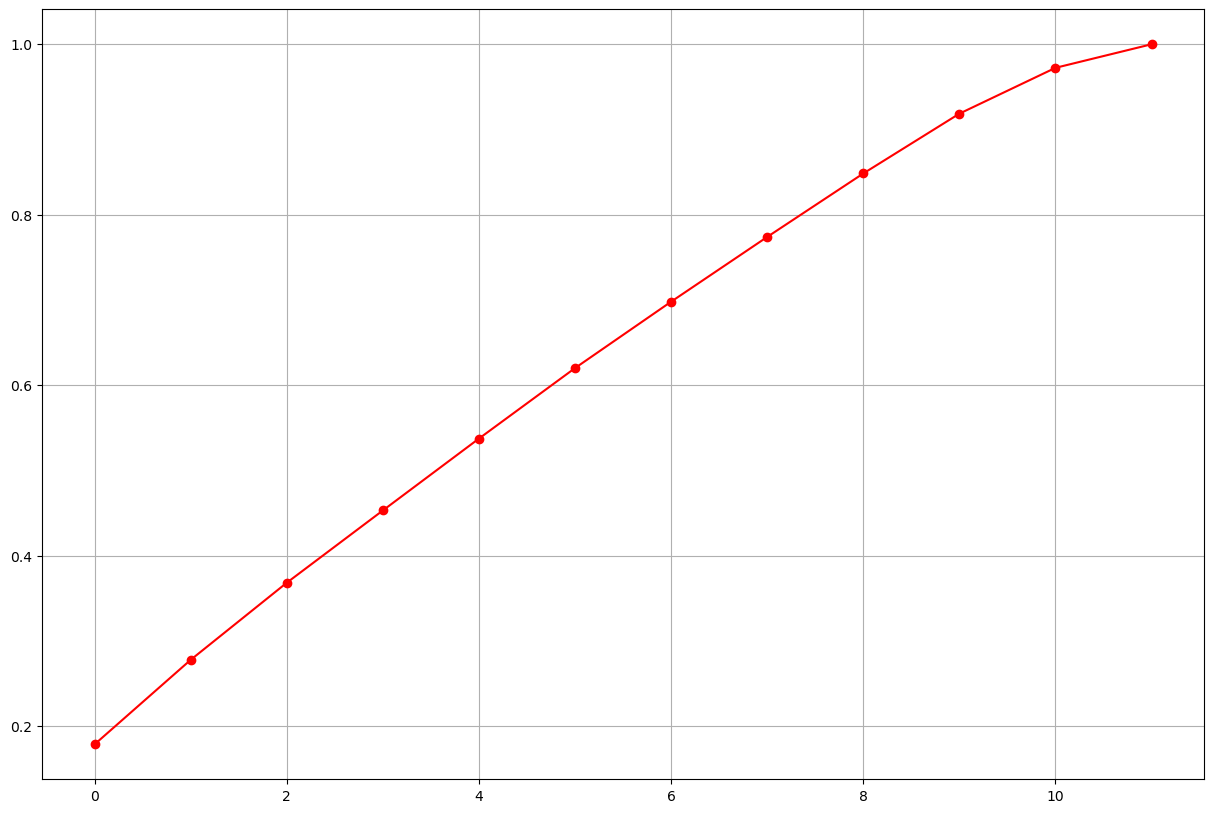

In [110]:
xp = pca.fit_transform(xs)
plt.figure(figsize=(15,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [111]:
# Taking first 9 components as maximum contribution comes from first 9.

In [112]:
pn = PCA(n_components = 9)
xp = pn.fit_transform(x)

In [113]:
x = pd.DataFrame(xp,columns=np.arange(9))
x.head()

,0,1,2,3,4,5,6,7,8
0,-1105.850014,-0.775800,4.820631,29.677624,-3.031067,1.219011,-0.619940,-2.361303,-0.147937
1,-1105.847459,-0.963736,-1.622491,0.842739,-1.203955,-0.532261,-0.448928,-0.854471,-2.346152
2,-1105.839350,-0.798988,12.982129,4.006985,0.164864,9.383333,-1.441250,-0.781984,0.029839
3,-1105.848246,-0.967813,-2.822376,0.799030,-3.380701,-1.223087,-0.333423,3.481390,-1.164215
4,-1105.849975,-0.794225,4.223408,26.704451,1.229028,5.555507,15.042658,-0.795601,0.103815


**5. Machine Learning Model Building**

In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [115]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.30, random_state = 42)

In [116]:
x_train.shape

(30676, 9)

In [117]:
x_test.shape

(13148, 9)

In [118]:
lg = LogisticRegression()        
gb = GaussianNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
sv = SVC()
rfc = RandomForestClassifier() 
etc = ExtraTreesClassifier()

In [119]:
model = [lg,gb,dtc,knc,rfc,etc,sv]

In [120]:
print('----------------Machine Learning Model Performance------------------\n')
def mod():
    for i in model:
        print(i,'\n')
        i.fit(x_train,y_train)
        print('Score:', i.score(x_train, y_train))
        pred = i.predict(x_test)
    
        print('accuracy_report:', accuracy_score(pred, y_test))
        print('Confusion_matrix:', confusion_matrix(y_test, pred))
        print('Classification_report:', classification_report(pred, y_test),'\n')
        score = cross_val_score(i,x,y, cv=5)
        print('Cross Validation Score for', i,':',score.mean())
        print('\n********************************************************************\n')
mod()

----------------Machine Learning Model Performance------------------

LogisticRegression() 

Score: 0.7410679358456123
accuracy_report: 0.7444478247642227
Confusion_matrix: [[4685 1914]
 [1446 5103]]
Classification_report:               precision    recall  f1-score   support

           0       0.71      0.76      0.74      6131
           1       0.78      0.73      0.75      7017

    accuracy                           0.74     13148
   macro avg       0.74      0.75      0.74     13148
weighted avg       0.75      0.74      0.74     13148
 

Cross Validation Score for LogisticRegression() : 0.7414888293472519

********************************************************************

GaussianNB() 

Score: 0.7822401877689399
accuracy_report: 0.7884088834803773
Confusion_matrix: [[5006 1593]
 [1189 5360]]
Classification_report:               precision    recall  f1-score   support

           0       0.76      0.81      0.78      6195
           1       0.82      0.77      0.79      6953


**Hyper Parameter Tuning**

In [121]:
parameter= {'criterion' : ['gini', 'entropy'],
              'min_samples_split':[3,5,8],
              'max_depth' : [20,30,40],
              'n_estimators' : [100, 150, 200]
             }

In [122]:
gc = GridSearchCV(ExtraTreesClassifier(),parameter,cv=5)
gc.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [20, 30, 40],
                         'min_samples_split': [3, 5, 8],
                         'n_estimators': [100, 150, 200]})

In [123]:
gc.best_params_

{'criterion': 'gini',
 'max_depth': 30,
 'min_samples_split': 3,
 'n_estimators': 200}

In [124]:
# Selecting best model

In [128]:
mod = ExtraTreesClassifier(criterion='gini',n_estimators= 200, max_depth=30, min_samples_split = 3 )
mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8835564344386979
[[5655  944]
 [ 587 5962]]
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      6599
           1       0.86      0.91      0.89      6549

    accuracy                           0.88     13148
   macro avg       0.88      0.88      0.88     13148
weighted avg       0.88      0.88      0.88     13148



In [126]:
# ROC-AUC curve

In [129]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

0.8836580087706993


Text(0, 0.5, 'TPR')

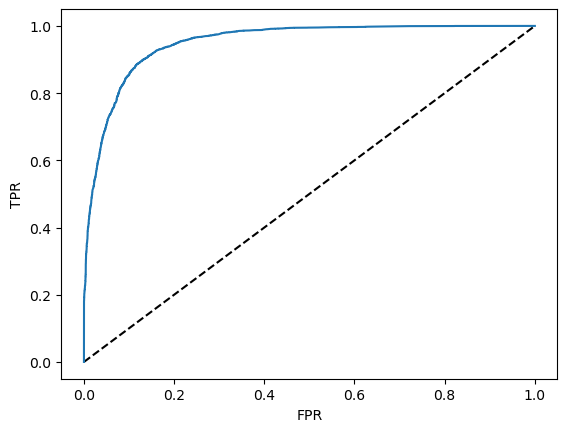

In [130]:
auc_score = roc_auc_score(y_test, mod.predict(x_test))
print(auc_score)

prob = mod.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [131]:
# Saving the best model

In [135]:
import joblib

In [136]:
joblib.dump(mod, 'bmod.obj')
bestmodel = joblib.load('bmod.obj')

In [137]:
bestmodel.predict(x_test)

array([0, 0, 1, ..., 0, 1, 0])